<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pySankey2-Demo" data-toc-modified-id="pySankey2-Demo-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>pySankey2 Demo</a></span><ul class="toc-item"><li><span><a href="#Twolayer-Sankey" data-toc-modified-id="Twolayer-Sankey-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Twolayer-Sankey</a></span></li><li><span><a href="#Multilayer-Sankey" data-toc-modified-id="Multilayer-Sankey-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multilayer-Sankey</a></span></li><li><span><a href="#Other-parameters" data-toc-modified-id="Other-parameters-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Other parameters</a></span><ul class="toc-item"><li><span><a href="#How-does-the-kernelSize-affect-the-smoothness-of-the-strip？" data-toc-modified-id="How-does-the-kernelSize-affect-the-smoothness-of-the-strip？-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>How does the kernelSize affect the smoothness of the strip？</a></span></li></ul></li></ul></li></ul></div>

# pySankey2 Demo

## Twolayer-Sankey

Let's quickly draw a 2-layer Sankey diagram

      R_ND_RESI1985_BA  R_ND_RESI1990_BA  R_ND_RESI1995_BA  R_ND_RESI2001_BA  \
0                    5                 2                 2                 4   
1                    5                 3                 2                 4   
2                    5                 4                 3                 1   
3                    5                 4                 3                 2   
4                    5                 4                 3                 4   
...                ...               ...               ...               ...   
4632                 1                 2                 2                 2   
4633                 1                 3                 2                 3   
4634                 1                 2                 3                 3   
4635                 1                 1                 2                 2   
4636                 1                 2                 2                 2   

      R_ND_RESI2005_BA  R_ND_RESI2010_B

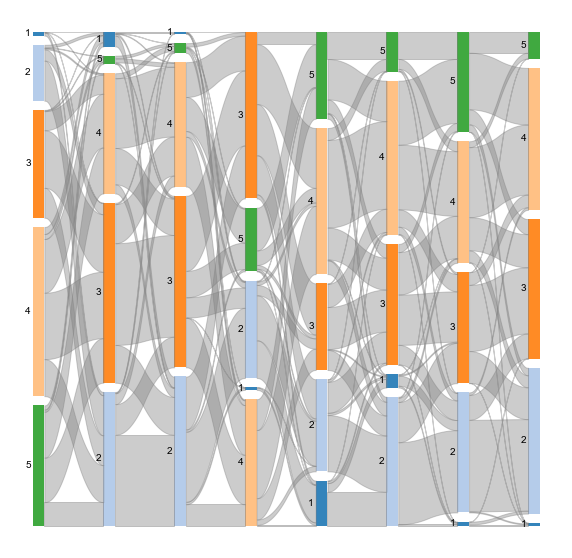

In [32]:
from pysankey2 import Sankey
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel('sample_all_1.xlsx',sheet_name='sample',header=0)
print(df)
sky_auto_global_colors = Sankey(df,colorMode="global")

fig,ax = sky_auto_global_colors.plot()

In [7]:
from pysankey2 import Sankey
from pysankey2.datasets import load_fruits

pysankey2 requires that each row of input dataframe represents a pair of source-target entities.

For example, the first row of fruits dataframe is blueberry -> blueberry, which reflects a source-target entity from blueberry to blueberry; the second row reflects a source-target entity from apple to blueberry.

In [29]:
df = load_fruits()
df.head()
print(df)

        layer1     layer2
0    blueberry  blueberry
1        apple  blueberry
2    blueberry  blueberry
3         lime       lime
4       orange     orange
..         ...        ...
995  blueberry     banana
996  blueberry  blueberry
997      apple      apple
998      apple     banana
999     orange     orange

[1000 rows x 2 columns]


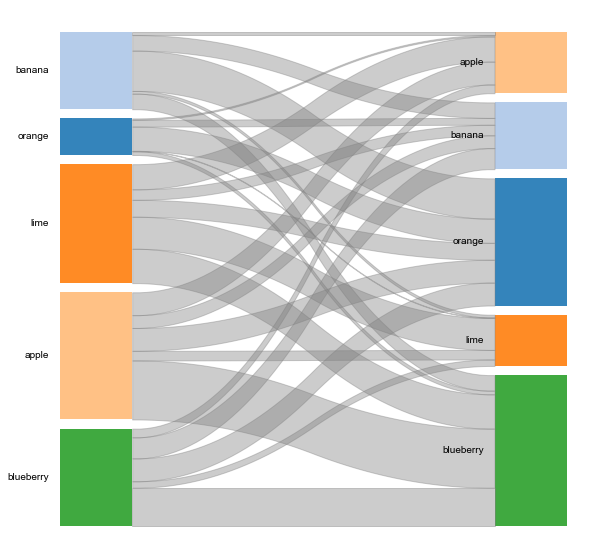

In [10]:
sky_auto_global_colors = Sankey(df,colorMode="global")
fig,ax = sky_auto_global_colors.plot()

Sometimes we may want to DIY the relative order and color of each boxes.With a little more codes:

     Y2010  Y2020  Y2010.1
0        4      4        4
1        4      4        4
2        5      4        5
3        4      4        4
4        3      3        3
..     ...    ...      ...
448      3      3        3
449      4      4        4
450      4      4        4
451      4      3        4
452      3      3        3

[453 rows x 3 columns]


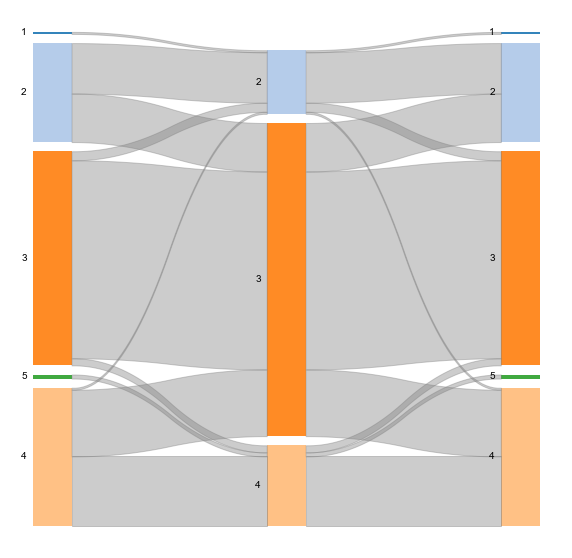

In [30]:
import pandas as pd
df = pd.read_excel('sample1.xlsx',sheet_name='sample',header=0)
print(df)
sky_auto_global_colors = Sankey(df,colorMode="global")

fig,ax = sky_auto_global_colors.plot()

In [11]:
from pysankey2.utils import setColorConf

In [12]:
fruits = list(set(df.layer1).union(set(df.layer2)))

# Specified the colors
# Here, we use 'Pastel1' colormaps(a shy bust fresh colormap :)).
# See matplotlib cmap for more colormaps:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html"""
colors = setColorConf(len(fruits),colors='Pastel1')
cls_map = dict(zip(fruits,colors))

# Specified the relative order in each layer.
layer_labels= {'layer1':['apple','banana','blueberry', 'lime', 'orange'],
                        'layer2':['apple','banana','blueberry', 'lime', 'orange']}

print(fruits)
print(colors)
print(cls_map)

['orange', 'banana', 'lime', 'apple', 'blueberry']
['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']
{'orange': '#fbb4ae', 'banana': '#b3cde3', 'lime': '#ccebc5', 'apple': '#decbe4', 'blueberry': '#fed9a6'}


TypeError: Got both 'fontsize' and 'size', which are aliases of one another

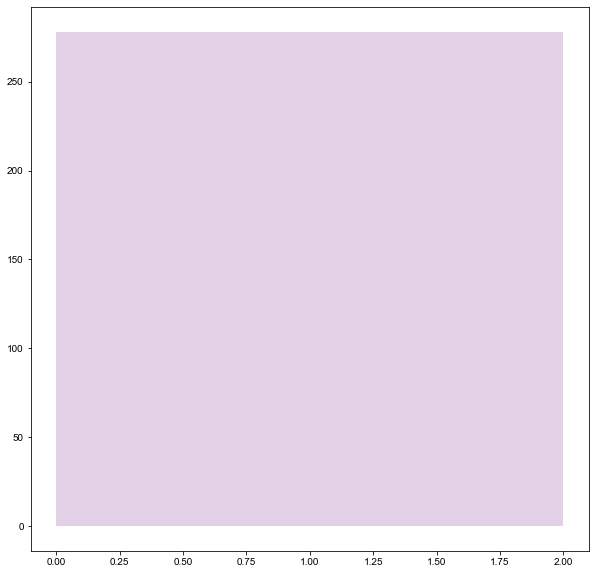

In [13]:
sky = Sankey(df,colorDict=cls_map,layerLabels = layer_labels,colorMode="global")
# set a bigger font size 
fig,ax = sky.plot(text_kws={'size':20})

In [14]:
"""inspect some properties in sankey object"""
print(sky.__dict__.keys())
print(sky.colorDict)
print(sky.colnameMaps)
print(sky.stripColor)

dict_keys(['dataFrame', '_colnameMaps', '_allLabels', '_layerLabels', 'colorMode', '_colorDict', '_stripColor', '_boxPos', '_layerPos', '_stripWidths'])
{'orange': '#fbb4ae', 'banana': '#b3cde3', 'lime': '#ccebc5', 'apple': '#decbe4', 'blueberry': '#fed9a6'}
{'layer1': 'layer1', 'layer2': 'layer2'}
grey


we can also set the strip color same with the left box:

In [ ]:
sky = Sankey(df,colorDict=cls_map,layerLabels = layer_labels,colorMode="global",stripColor='left')
# set a bigger font size 
fig,ax = sky.plot(text_kws={'size':20})

wow, pretty nice!

a user-provided layer specific colormap is also allowed:

In [ ]:
fruits_l1 = list(set(df.layer1))
fruits_l2 =  list(set(df.layer2))
# Specified the colors
colors_l1 = setColorConf(len(fruits_l1),colors='Pastel1')
colors_l2 = setColorConf(len(fruits_l2),colors='Dark2')

cls_map_l1 = dict(zip(fruits_l1,colors_l1))
cls_map_l2 = dict(zip(fruits_l2,colors_l2))

cls_map = {'layer1':cls_map_l1,'layer2':cls_map_l2}

# Specified the relative order in each layer.
layer_labels= {'layer1':['apple','banana','blueberry', 'lime', 'orange'],
                        'layer2':['apple','banana','blueberry', 'lime', 'orange']}

print(cls_map)

In [ ]:
sky_auto_global_colors = Sankey(df,
                                colorDict=cls_map,
                                #layerLabels = layer_labels,
                                colorMode="layer")

# a bigger font size is nice.
fig,ax = sky_auto_global_colors.plot(text_kws={'size':20})

## Multilayer-Sankey

In [15]:
from pysankey2 import Sankey
from pysankey2.datasets import load_countrys

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

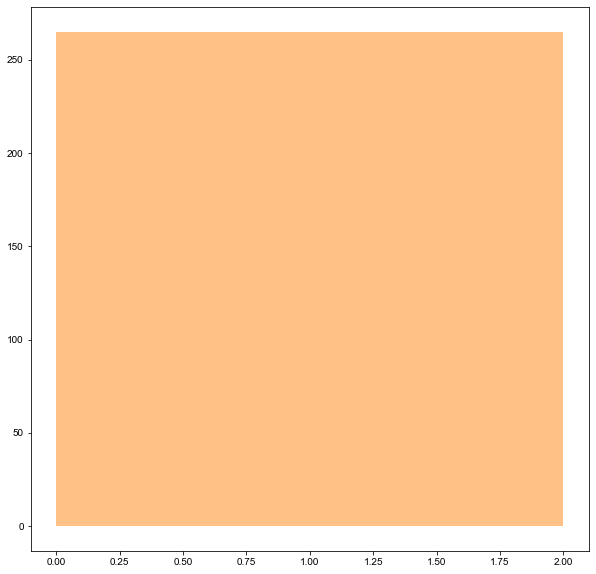

In [16]:
df = load_countrys()
sky_auto_global_colors = Sankey(df,colorMode="global")
fig,ax = sky_auto_global_colors.plot(text_kws={'size':15})

#plt.show()

## Other parameters

Let's take a look at Sankey, which provides many parameters to set.

In [ ]:
help(Sankey)

Since parameters mainly come from the plot method, let quickly go through with a demo:

In [ ]:
sky = Sankey(df,colorDict=cls_map,layerLabels = layer_labels,colorMode="global",stripColor='left')
# set a bigger font size 
fig,ax = sky.plot(
    figSize=(12,8), ## set the figure size
    fontSize=20,   ## font size
    fontPos=(0.05,0.5), ## font position relative to the box ,0.05: 5% to the right of each box,
                        ## 0.5: 50% to the bottom of each box
    boxInterv=0,    ## set zero gap between boxes
    kernelSize=25,  ## kernelSize determines the smoothness of the strip( default=25)
    stripShrink=2,  ## setting he curve shrink slightly
    text_kws={'horizontalalignment':'left'}  ## parameters within text_kws will be passed to plt.text()
                    ##  In this case, we align the left as the starting position of labels. 
    )

In [ ]:
## now save the image
fig.savefig("my_sankey.pdf",bbox_inches="tight",dpi=800)

### How does the kernelSize affect the smoothness of the strip？

The size of the convolution kernel will directly affect the smoothness of the strip. Intuitively, the larger the size, the wider the sliding window range, the easier it is to smooth. However, for the beauty of the strip, the kernel has an optimal range, I suggest kernelSize=20~30. Let's look at how different kernelSizes affect smoothness:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

kernelSizes=[10,20,30,40,50]
plt.rc('font', size=15) 
plt.rc('font', serif='Arial') 
fig = plt.figure(figsize = [12,25])
fig.set_facecolor('white')

i=1
for kernelSize in kernelSizes:
    ys_c0 = np.array(50 * [0] + 50 * [5])
    ys_c1 = np.convolve(ys_c0  ,(1/kernelSize) * np.ones(kernelSize), mode='valid')
    ys_c2 = np.convolve(ys_c1 , (1/kernelSize) * np.ones(kernelSize), mode='valid')
    
    ax1 = fig.add_subplot(5,3,i)
    ax2 = fig.add_subplot(5,3,i+1)
    ax3 = fig.add_subplot(5,3,i+2)
    ax1.plot(ys_c0)
    ax2.plot(ys_c1)
    ax3.plot(ys_c2)
    ax1.set_title('unconvolve,size=' + str(kernelSize))
    ax2.set_title('convolve once,size=' + str(kernelSize))
    ax3.set_title('convolve twice,size=' + str(kernelSize))
    i = i+3